# Time Series Modeling

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. Let’s get started!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set(style="whitegrid")

## Loading Superstore Sales Data

In [2]:
data = pd.read_excel("Superstore.xls")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preprocessing

This step includes filtering categories, removing columns we do not need, check missing values, aggregate sales by date and so on.

First thing first, there are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [3]:
print('Suersore categories: ', data.Category.unique())
furniture = data.loc[data['Category'] == 'Furniture']
furniture.head()

Suersore categories:  ['Furniture' 'Office Supplies' 'Technology']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Data Validation (Time Range, Missing Values)

In [4]:
print('Time range:', furniture['Order Date'].min(), 'to', furniture['Order Date'].max())

Time range: 2014-01-06 00:00:00 to 2017-12-30 00:00:00


In [5]:
print('Verify missing valuse')
furniture.isnull().sum()

Verify missing valuse


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Extract order year, month, day

The `apply()` method can be applied both to series and dataframes where function can be applied both series and individual elements based on the type of function provided. The function passed as an argument typically works on rows/columns.

The `map()` method only works on a pandas series where type of operation to be applied depends on argument passed as a function, dictionary or a list. This method is generally used to map values from two series having one column same.

In [6]:
furniture.loc[:,'Order Year'] = furniture['Order Date'].apply(lambda x: x.year)
furniture.loc[:,'Order Month'] = furniture['Order Date'].apply(lambda x: x.month)
furniture.loc[:,'Order Day'] = furniture['Order Date'].map(lambda x: x.day)
furniture.loc[:, ['Order Year','Order Month','Order Day']].head()

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Order Year,Order Month,Order Day
0,2016,11,8
1,2016,11,8
3,2015,10,11
5,2014,6,9
10,2014,6,9


### Data Aggregation

The `groupby` method can be used to aggregate our data by specific columns.

On the other hand, the `resample()` method also allow us to do aggregation, but we need set timestamp as index in advance.

In [7]:
furniture_sales = furniture.groupby(['Order Year', 'Order Month'])['Sales'].agg(['sum'])
furniture_sales.head(12)

sum
Order Year Order Month            
2014       1             6242.5250
           2             1839.6580
           3            14573.9560
           4             7944.8370
           5             6912.7870
           6            13206.1256
           7            10821.0510
           8             7320.3465
           9            23816.4808
           10           12304.2470
           11           21564.8727
           12           30645.9665

In [11]:
x = furniture.set_index('Order Date')['Sales'].resample('MS').sum()
x.head(12)

Order Date
2014-01-01     6242.5250
2014-02-01     1839.6580
2014-03-01    14573.9560
2014-04-01     7944.8370
2014-05-01     6912.7870
2014-06-01    13206.1256
2014-07-01    10821.0510
2014-08-01     7320.3465
2014-09-01    23816.4808
2014-10-01    12304.2470
2014-11-01    21564.8727
2014-12-01    30645.9665
Freq: MS, Name: Sales, dtype: float64

## Exploratory Data Analysis

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year.

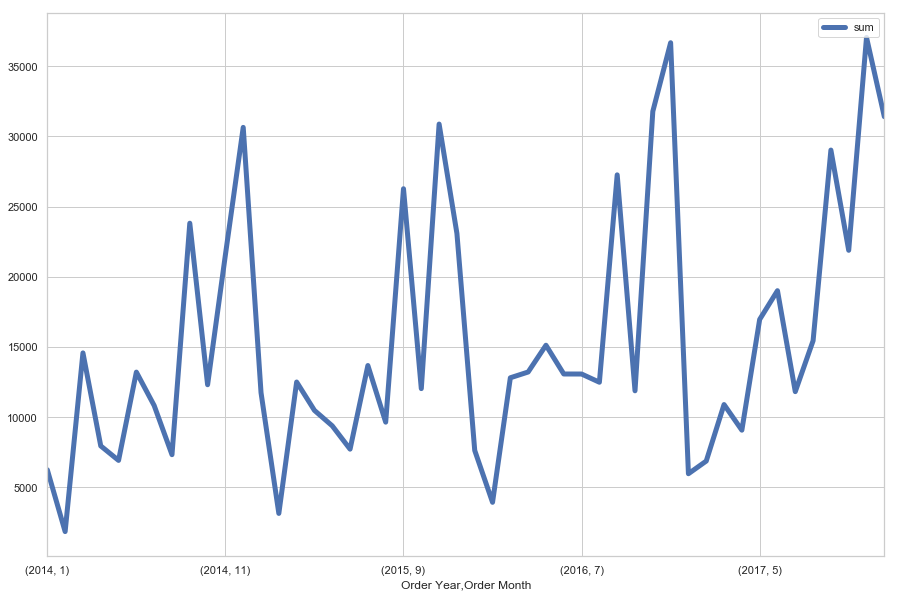

In [9]:
furniture_sales.plot(figsize=(15, 10), linewidth=5)
plt.show()

We can also visualize our data using a method called `time-series decomposition` that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

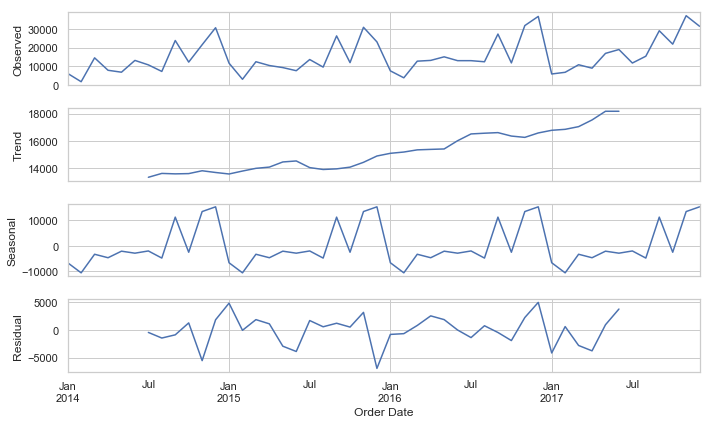

In [21]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
fig.savefig('ts.png')
plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation $ARIMA(p, d, q)$. These three parameters account for seasonality, trend, and noise in data. The step is parameter selection for our furnitures's sales ARIMA time series model. Our goal here is to use `grid search` to find the optimal set of parameters that acheive the best performance for model.

In [13]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1056.7150862281565


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1466.9610577217322
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:691.3931482484253
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:711.2492842040824


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1574.711856308896
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:475.92673489624383
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1015.7594088766147
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5357.395646255874
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:674.6304760632347
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:779.6594254270542
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:15355827.6267757
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:476.78163414148753
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:984.8655318416035


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1253.9681302367949
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:695.1954904555535
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:714.9998830715462
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1267.45140823629
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:465.69545058897455
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:951.7793999338526
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4015.112931295994
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:661.9233286800262
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:722.8537157562655
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3221.7610170644243


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:456.76590120880064
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1004.4816979471111
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:4029.1127005853123
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:693.3745609205154
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:692.6310815982955


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1288.972370746136
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:457.45737142990026
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:972.0249334783354
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4798.32673308274
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:676.2929443169887


E:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:691.5147186644808
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10571.79663733227
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:461.25506448673417
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:978.8821919709102
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3509.0974019614832
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:688.968184582855
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:689.4352318768509
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3196.3304722598277
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:444.1590804588896
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:951.9842334429748
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3423.773416614111
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:663.7583996681227
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:703.625451657872
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:15985172.835145904
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:439.17230991499673


In [14]:
mod = sm.tsa.statespace.SARIMAX(x,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0956      0.429     -0.223      0.824      -0.936       0.745
ma.L1         -0.8562      0.232     -3.684      0.000      -1.312      -0.401
ar.S.L12      -0.3040      0.275     -1.104      0.269      -0.844       0.236
sigma2      2.809e+07   6.57e-10   4.28e+16      0.000    2.81e+07    2.81e+07


<Figure size 432x288 with 0 Axes>

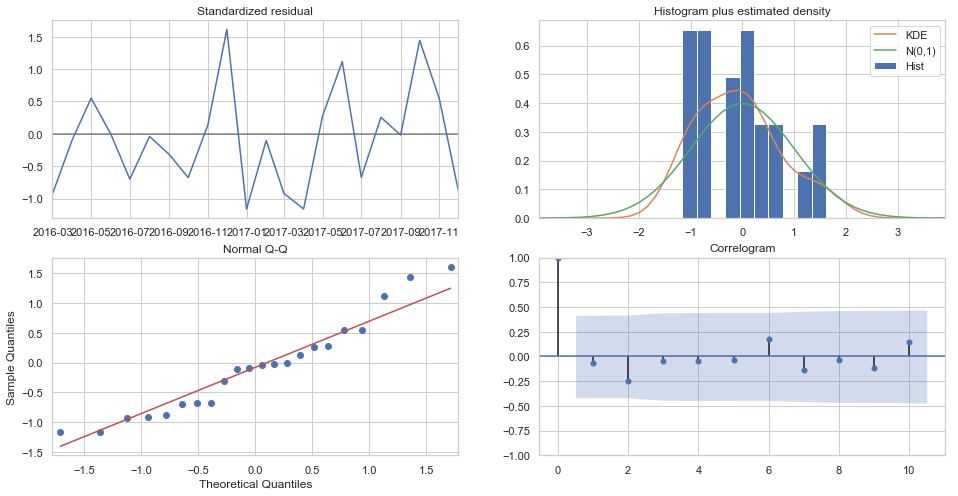

In [22]:
plt.figure(figsize=(6,4))
fig = results.plot_diagnostics(figsize=(16, 8))
fig.savefig('ts_diag.png')
plt.show()


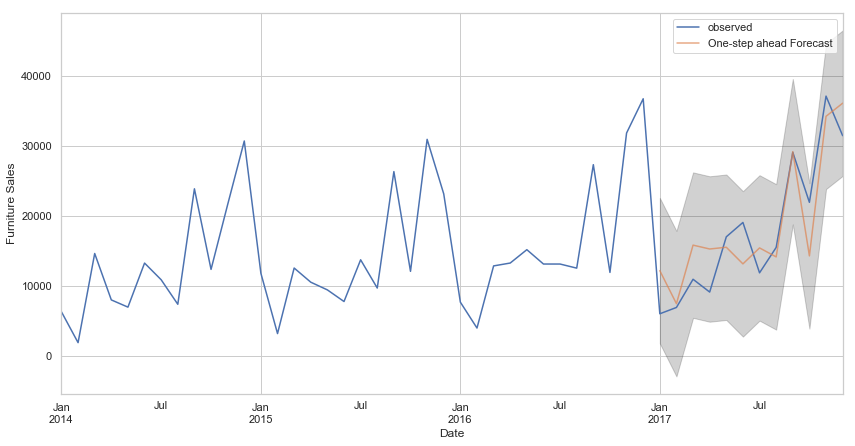

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = x.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()